# **Real World Tech Sales Data analysis**

This is a EDA of sales data of a tech store done primarily using pandas and matplotlib. I have tackled few of the common real world data science questions in this analysis. 

**Importing necessary packages and uploading data**

In [1]:
#Importing Pandas and Os
import pandas as pd
import os

In [2]:
#uploading data
df=pd.read_csv("/kaggle/input/sales-analysis1/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#concatenating files into one for analysis 
files =[file for file in os.listdir('/kaggle/input/sales-analysis1')]
months_combined = pd.DataFrame()

#saving the new frame.
for file in files:
    df= pd.read_csv('/kaggle/input/sales-analysis1/'+ file)
    months_combined= pd.concat([months_combined, df])
months_combined.to_csv('months_combined.csv',index=False)

In [4]:
#checking the shape of the df checking the concat.
full_df=pd.read_csv('/kaggle/working/months_combined.csv')
full_df.shape

(186850, 6)

**Q1: What was the best month for sales?**



In [5]:
#Adding a 'Month' column
full_df['Month'] = full_df["Order Date"].str[0:2]
full_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [6]:
#Casting Month column as integer for further calculations. We can choose only the rows that have integer values in the month column 
full_df=full_df[full_df['Month']!='Or']
print(full_df)

       Order ID                     Product Quantity Ordered Price Each  \
0        236670            Wired Headphones                2      11.99   
1        236671  Bose SoundSport Headphones                1      99.99   
2        236672                      iPhone                1      700.0   
3        236673       AA Batteries (4-pack)                2       3.84   
4        236674       AA Batteries (4-pack)                2       3.84   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address Month  
0       08/31/19 22:21      

In [7]:
#Dropping NaN values 
full_df.dropna(inplace=True) 

In [8]:
#Casting columns as the required type for analysis 
full_df['Month']=full_df['Month'].astype(int)
full_df['Quantity Ordered']=full_df['Quantity Ordered'].astype(int)
full_df['Price Each']=full_df['Price Each'].astype(float)
full_df['Puerchase Address']=full_df['Purchase Address'].astype(str)

In [9]:
#creating 'Sales' column to calculate the total sum of the product ordered 
full_df['Sales']=full_df['Quantity Ordered']*full_df['Price Each']

full_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Puerchase Address,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,"736 14th St, New York City, NY 10001",7.68


/tmp/ipykernel_20/4135084982.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot=full_df.groupby('Month').sum()


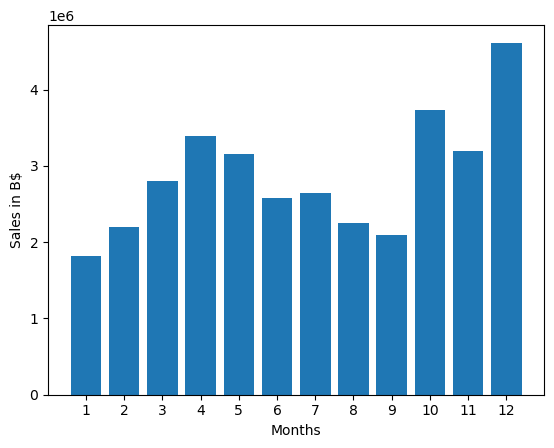

In [10]:
#Grouping by 'Month' column and plotting the result
plot=full_df.groupby('Month').sum()
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,plot['Sales'])
plt.xticks(months)
plt.ylabel('Sales in B$')
plt.xlabel('Months')
plt.show()


**Q2:What is the highest revenue generating city?**

In [11]:
#Extracting city names from address 
def city_name(purchase_address):
    address_parts = purchase_address.split(',')
    if len(address_parts) >= 2:
        return address_parts[1].strip()
def state_name(purchase_address):
    return purchase_address.split(',')[2].split(' ')[1]
#Adding a new 'City' column
full_df['City'] = full_df['Purchase Address'].apply(lambda x: city_name(x) + " ("+state_name(x)+')')
full_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Puerchase Address,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,"149 7th St, Portland, OR 97035",700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,"736 14th St, New York City, NY 10001",7.68,New York City (NY)


/tmp/ipykernel_20/1180526797.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot=full_df.groupby('City').sum()


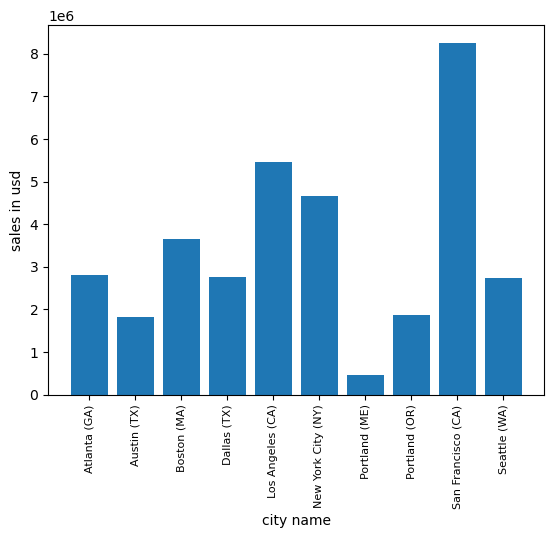

In [12]:
#Grouping by city and plotting the results 
plot=full_df.groupby('City').sum()
cities=[city for city,df in full_df.groupby('City')]
plt.bar(cities,plot['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('sales in usd')
plt.xlabel('city name')
plt.show()

**Q3:What is the best time for advertising?**

In [13]:
#Casting 'Order Date' column as time using datetime()
full_df['Order Date']=pd.to_datetime(full_df['Order Date'])


In [14]:
#Creating 'Hour' column with only hour from 'Order Date'
full_df['Hour']=full_df['Order Date'].dt.hour
full_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Puerchase Address,Sales,City,Hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX),15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,"149 7th St, Portland, OR 97035",700.00,Portland (OR),14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA),20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,"736 14th St, New York City, NY 10001",7.68,New York City (NY),19


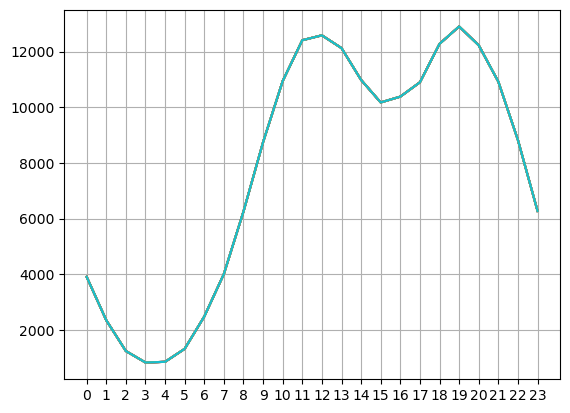

In [15]:
#Grouping by 'Hour' and plotting the count
hours=[hour for hour,df in full_df.groupby('Hour')]

plt.plot(full_df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

**Q3:What products were sold together the most?**

In [16]:
#Finding duplicated order IDs since purchases made together havem the same order ID
df= full_df[full_df['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()


/tmp/ipykernel_20/3583397070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [17]:
#Importing combinations and Counter to count the combinations of products sold together 
from itertools import combinations 
from collections import Counter

count = Counter()

for row in df['Grouped']:
    split_row = row.split(',')
    count.update(Counter(combinations(split_row,2)))
    
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/tmp/ipykernel_20/1487767570.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered= product_group.sum()['Quantity Ordered']


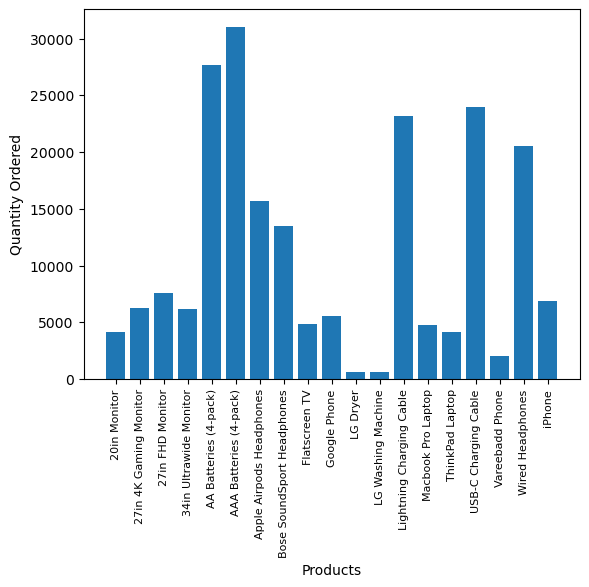

In [18]:
#plotting the result
product_group = full_df.groupby('Product')
quantity_ordered= product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xlabel('Products')
plt.xticks(products,rotation='vertical',size = 8 )
plt.ylabel('Quantity Ordered')
plt.show()
